In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from utils import *

# KiDS x GAIA

In [3]:
kids_x_gaia = process_kids('/home/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.cols.csv', with_colors=True)

Data shape: (1525462, 33)
Droping NANs: 1525462 left
Removing flags: 599223 left
Removing errors bigger than observations: 598856 left
Removing limiting magnitudes: 513108 left
Clean data shape: (513108, 43)


In [4]:
kids_x_gaia, kids_x_gaia_sdss = add_sdss_info(kids_x_gaia, '/home/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.csv')

SDSS data shape: (29297, 4)
SDSS info shape: (10445, 47)
(array(['GALAXY', 'QSO', 'STAR', 'UNKNOWN'], dtype=object), array([  2176,   2672,   5597, 502663]))


In [ ]:
kids_x_gaia_sampled = kids_x_gaia.sample(10000, random_state=1467)

In [5]:
X_gaia_sampled = kids_x_gaia_sampled[COLOR_COLUMNS]

In [10]:
X_gaia_scaled = MinMaxScaler().fit_transform(X_gaia_sampled)

In [11]:
X_gaia_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                         n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                         random_state=4680, method='barnes_hut', angle=0.5).fit_transform(X_gaia_scaled)

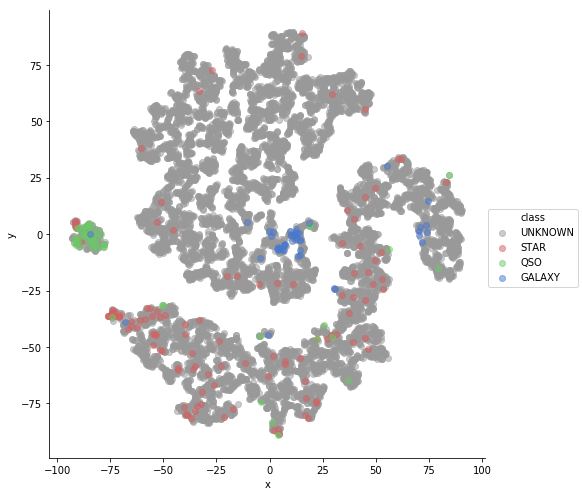

In [14]:
# Embedding with SDSS labels
plot_embedding(X_gaia_embedded, kids_x_gaia_sampled['CLASS_FILLED'])

# KiDS CLASS_STAR

In [3]:
kids_star = process_kids('/home/snakoneczny/data/KiDS/KiDS.DR3.stars.cols.csv', with_colors=True, n=500000)

Data shape: (500000, 32)
Droping NANs: 500000 left
Removing flags: 218660 left
Removing errors bigger than observations: 217337 left
Removing limiting magnitudes: 108555 left
Clean data shape: (108555, 42)


In [4]:
kids_star, kids_star_x_sdss = add_sdss_info(kids_star, '/home/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv')

SDSS data shape: (91317, 4)
SDSS info shape: (1462, 46)
(array(['GALAXY', 'QSO', 'STAR', 'UNKNOWN'], dtype=object), array([    31,    525,    906, 107093]))


In [5]:
kids_star_sampled = kids_star.sample(10000, random_state=1467)

In [6]:
X_star_sampled = kids_star_sampled[COLOR_COLUMNS]

In [7]:
X_star_scaled = MinMaxScaler().fit_transform(X_star_sampled)

In [8]:
X_star_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                       n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                       random_state=4680, method='barnes_hut', angle=0.5).fit_transform(X_star_scaled)

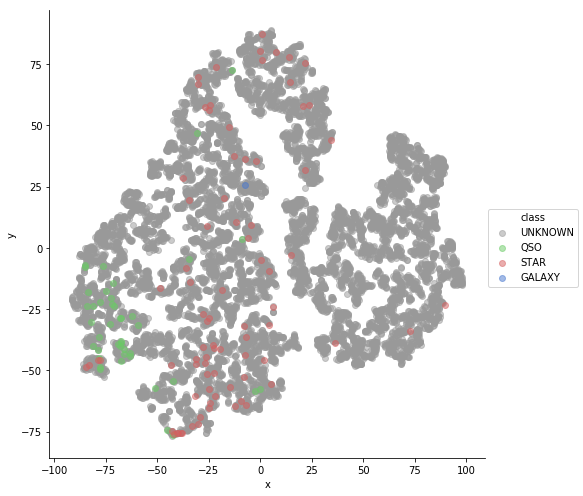

In [9]:
# Embedding with SDSS labels
plot_embedding(X_star_embedded, kids_star_sampled['CLASS_FILLED'])

# KiDS ALL (!)

In [14]:
kids = process_kids('/home/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', with_colors=True)

Data shape: (487365, 32)
Droping NANs: 487365 left
Removing flags: 204368 left
Removing errors bigger than observations: 202239 left
Removing limiting magnitudes: 48970 left
Clean data shape: (48970, 42)


In [15]:
kids, kids_x_sdss = add_sdss_info(kids, '/home/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv')

SDSS data shape: (91317, 4)
SDSS info shape: (261, 46)
(array(['GALAXY', 'QSO', 'STAR', 'UNKNOWN'], dtype=object), array([  116,    55,    90, 48709]))


In [16]:
kids_sampled = kids.sample(10000, random_state=1467)

In [17]:
X_sampled = kids_sampled[COLOR_COLUMNS]

In [18]:
X_scaled = MinMaxScaler().fit_transform(X_sampled)

In [19]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=4680, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

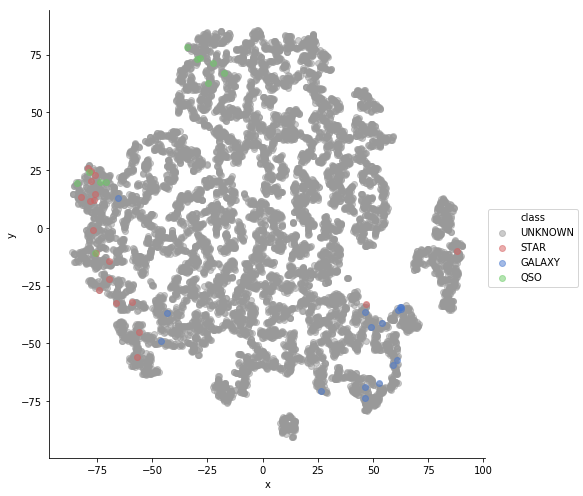

In [20]:
# Embedding with SDSS labels
plot_embedding(X_embedded, kids_sampled['CLASS_FILLED'])